In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data from the Excel file
data = pd.read_excel("bitcoin.xlsx")

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Display the data
data

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Display the data
data

,Date,Price
9,2019-01-06,8564.016602
39,2019-01-07,10583.134770
70,2019-01-08,10399.668950
101,2019-01-09,9757.970703
131,2019-01-10,8343.276367
...,...,...
234,2020-12-01,8192.494141
265,2020-12-02,10326.054690
294,2020-12-03,4970.788086
325,2020-12-04,6971.091797


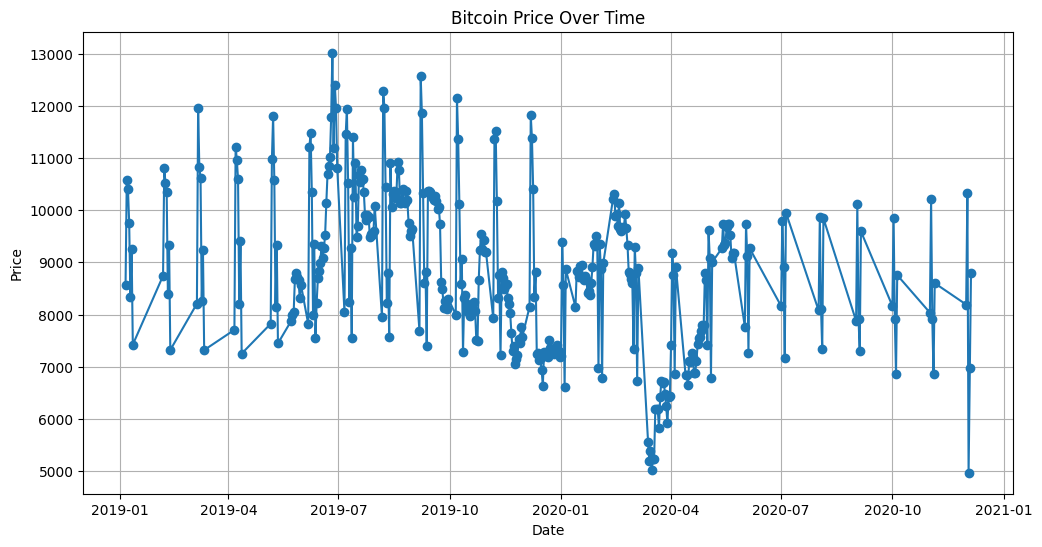

In [3]:
# Plot the Bitcoin price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], marker='o', linestyle='-')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [4]:
# Create a feature (X) and target (y) variable
X = data['Date'].values.astype(np.int64) // 10**9  # Convert date to Unix timestamp
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on the test data
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1677101.5524641492


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Create a feature (X) and target (y) variable
X = data['Date'].values.astype(np.int64) // 10**9  # Convert date to Unix timestamp
y = data['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
decision_tree_predictions = decision_tree_reg.predict(X_test.reshape(-1, 1))

# Calculate Mean Squared Error for the Decision Tree Regressor
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)

# Display MSE for the Decision Tree Regressor
print(f"Decision Tree Regressor MSE: {decision_tree_mse}")

Decision Tree Regressor MSE: 2097314.136865856


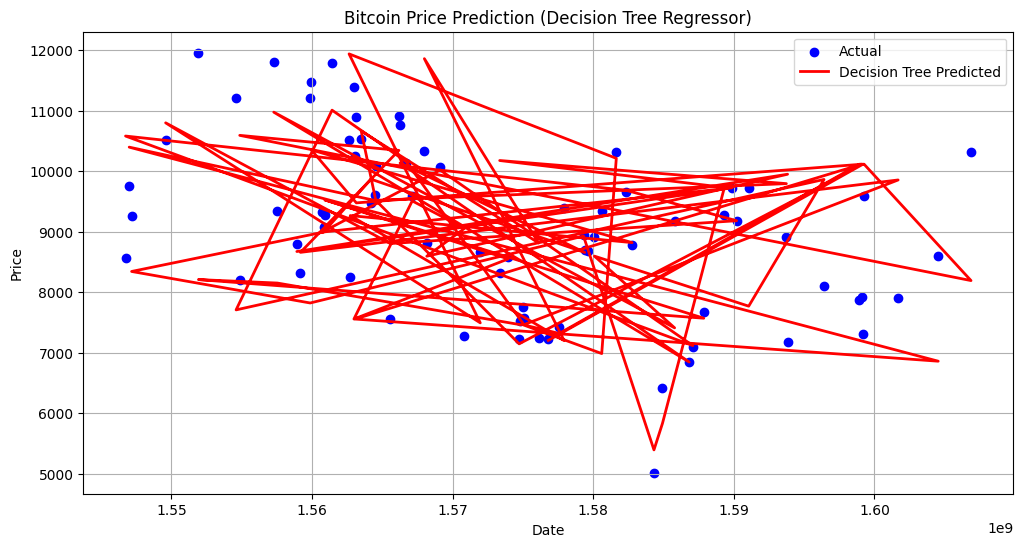

In [10]:
# Plot the actual vs. predicted prices for the Decision Tree Regressor
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, decision_tree_predictions, color='red', linewidth=2, label='Decision Tree Predicted')
plt.title('Bitcoin Price Prediction (Decision Tree Regressor)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Initialize and train the Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
random_forest_predictions = random_forest_reg.predict(X_test.reshape(-1, 1))

# Calculate Mean Squared Error for the Random Forest Regressor
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

# Display MSE for the Random Forest Regressor
print(f"Random Forest Regressor MSE: {random_forest_mse}")

Random Forest Regressor MSE: 1476109.050157955


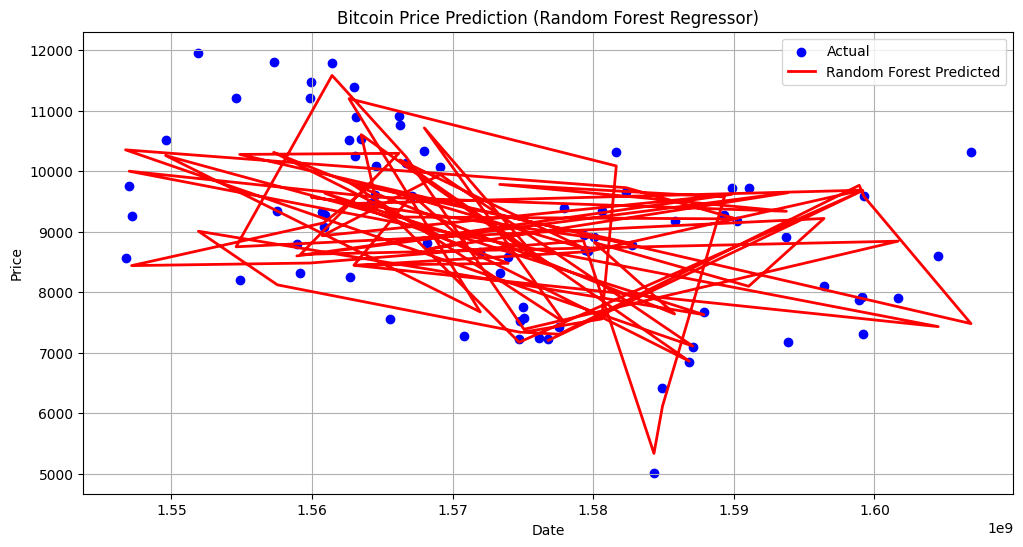

In [12]:
# Plot the actual vs. predicted prices for the Random Forest Regressor
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, random_forest_predictions, color='red', linewidth=2, label='Random Forest Predicted')
plt.title('Bitcoin Price Prediction (Random Forest Regressor)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train.reshape(-1, 1), y_train)

# Make predictions
linear_reg_predictions = linear_reg.predict(X_test.reshape(-1, 1))

# Calculate Mean Squared Error for the Linear Regression model
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

# Display MSE for the Linear Regression model
print(f"Linear Regression MSE: {linear_reg_mse}")

Linear Regression MSE: 1677101.5524641492


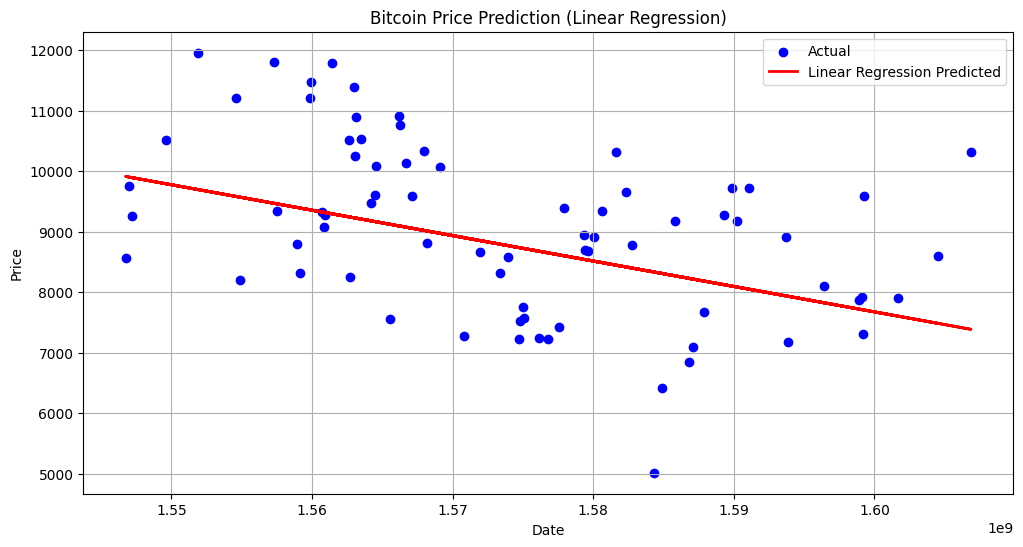

In [14]:
# Plot the actual vs. predicted prices for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, linear_reg_predictions, color='red', linewidth=2, label='Linear Regression Predicted')
plt.title('Bitcoin Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Create a feature (X) and binary target (y) variable
X = data['Date'].values.astype(np.int64) // 10**9  # Convert date to Unix timestamp
y = (data['Price'].diff() > 0).astype(int)  # Binary label: 1 if price went up, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train.reshape(-1, 1), y_train)
# Make predictions
logistic_reg_predictions = logistic_reg.predict(X_test.reshape(-1, 1))

In [18]:
# Calculate accuracy for the Logistic Regression model
accuracy = accuracy_score(y_test, logistic_reg_predictions)

# Display classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, logistic_reg_predictions))
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        34
           1       0.00      0.00      0.00        40

    accuracy                           0.46        74
   macro avg       0.23      0.50      0.31        74
weighted avg       0.21      0.46      0.29        74

Accuracy: 45.95%


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [20]:
# Load the dataset
data = pd.read_excel("bitcoin.xlsx")

In [21]:
# Split the dataset into the training and test sets
train_data = data.head(80)
test_data = data.tail(20)

In [22]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(128, activation="tanh", input_shape=(1, 2)))
model.add(Dense(1))

In [23]:
import numpy as np

# Assuming you have a 1D array of prices
prices = train_data["Price"].values

# Define the sequence length (number of time steps)
sequence_length = 10  # You can adjust this as needed

# Reshape the data
X_train = []
y_train = []

for i in range(len(prices) - sequence_length):
    X_train.append(prices[i:i+sequence_length])
    y_train.append(prices[i+sequence_length])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
3/3 [==============================] - 3s 8ms/step - loss: 66626304.0000
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 72677624.0000
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 64412796.0000
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 55071456.0000
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 37642168.0000
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 31926378.0000
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 23386236.0000
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 24900378.0000
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 26653550.0000
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 22351384.0000
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 19611152.0000
Epoch 12/100
3/3 [==============================] - 0s 8ms/step

In [25]:
# Make predictions
predictions = model.predict(test_data["Price"].values.reshape(20, 1))

1/1 [==============================] - 0s 326ms/step


In [26]:
# Print the predictions
print(predictions)

[[2039.2731]
 [2059.9597]
 [2120.7476]
 [2276.9563]
 [2252.052 ]
 [2195.1355]
 [2003.5306]
 [1968.1515]
 [2014.5233]
 [2121.028 ]
 [2227.1262]
 [2134.346 ]
 [2145.5146]
 [2212.7166]
 [2225.4915]
 [2226.055 ]
 [2178.911 ]
 [2077.9636]
 [2101.0293]
 [2100.4502]]


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [28]:
# Assuming you have a "Date" column and a "Price" column in your dataset
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [29]:
# Define the two time periods
start_date_1 = '2019-05-23'
end_date_1 = '2019-12-31'

start_date_2 = '2020-01-01'
end_date_2 = '2020-05-23'

In [1]:
import pandas as pd
import numpy as np

# Load the dataset from the Excel file
df = pd.read_excel('bitcoin.xlsx')

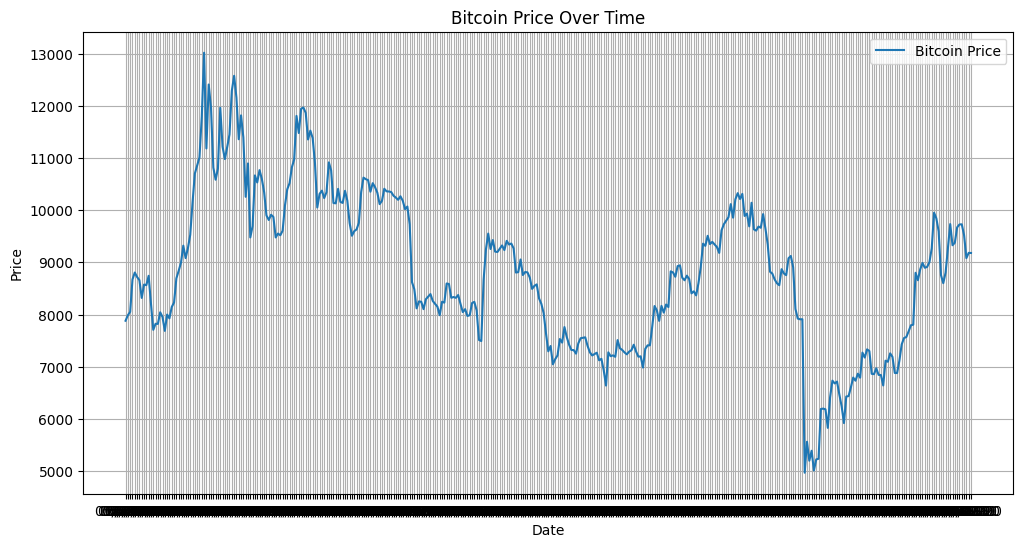

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
df = pd.read_excel('bitcoin.xlsx')

# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Plot the Bitcoin prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].dt.strftime('%m/%d-%y'), df['Price'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid()
plt.show()


In [4]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the number of days since the start date
start_date = df['Date'].min()
df['Days'] = (df['Date'] - start_date).dt.days

# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)

# Display the updated dataframe
print(df.head())


         Price  Days
0  7881.846680   137
1  7987.371582   138
2  8052.543945   139
3  8673.215820   140
4  8805.778320   141


In [5]:
from sklearn.model_selection import train_test_split

X = df[['Days']]  # Input feature (number of days)
y = df['Price']   # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (293, 1)
X_test shape: (74, 1)
y_train shape: (293,)
y_test shape: (74,)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2278092.5291833603
R-squared: 0.13492791883791577


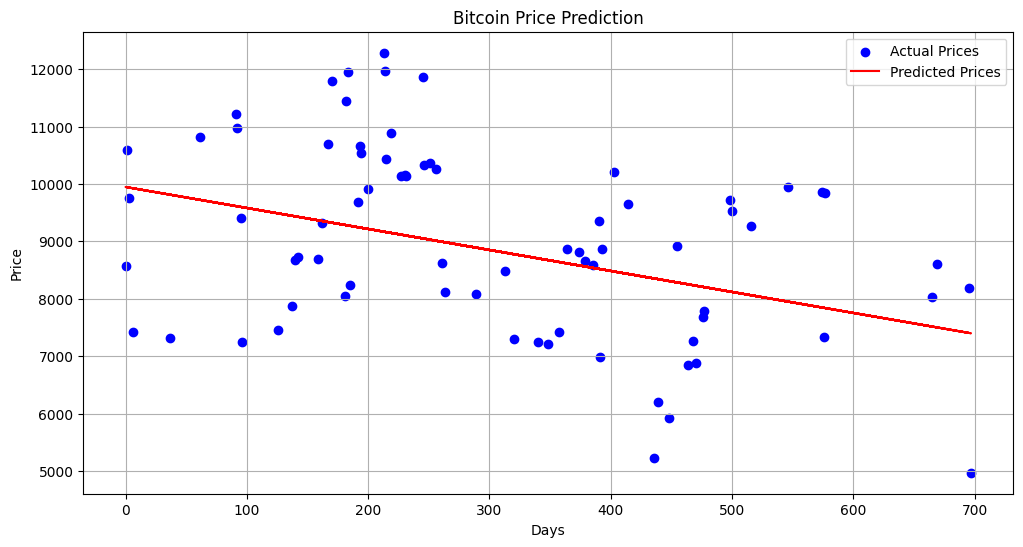

In [7]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label='Actual Prices', color='b')
plt.plot(X_test, y_pred, label='Predicted Prices', color='r')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.grid()
plt.show()

ADF Statistic: -2.476735941197219
p-value: 0.12123781073112527
Critical Values:
1%: -3.448343869853195
5%: -2.869469418606909
10%: -2.570994248260623
ADF Statistic: -20.687835710726933
p-value: 0.0
Critical Values:
1%: -3.4483935212959844
5%: -2.8694912343676497
10%: -2.571005879151811


c:\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


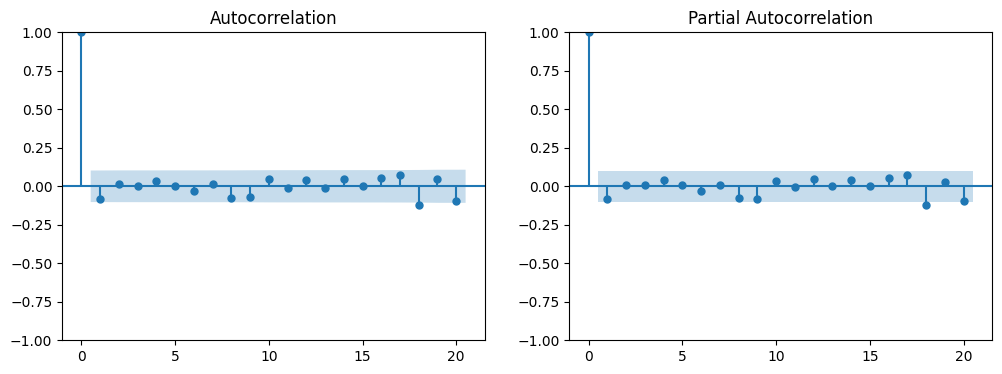

c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2682.782
Date:                Tue, 05 Sep 2023   AIC                           5371.564
Time:                        11:11:45   BIC                           5383.264
Sample:                             0   HQIC                          5376.214
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2669      0.436     -0.613      0.540      -1.121       0.587
ma.L1          0.1890      0.445      0.425      0.671      -0.682       1.060
sigma2      1.422e+05   4023.007     35.337      0.0

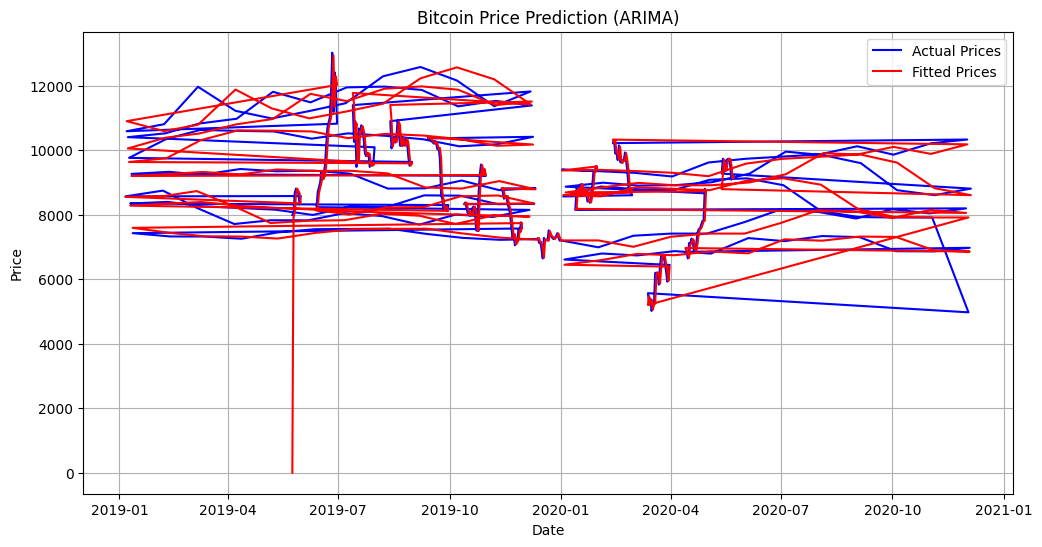

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset from the Excel file
df = pd.read_excel('bitcoin.xlsx')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Check stationarity using the Augmented Dickey-Fuller test
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

# Plot the ACF and PACF to determine p and q for ARIMA
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(timeseries, ax=ax1, lags=20)
    plot_pacf(timeseries, ax=ax2, lags=20)
    plt.show()

# Test stationarity and apply differencing if needed
test_stationarity(df['Price'])

# Perform differencing to make the time series stationary
df['Price_diff'] = df['Price'] - df['Price'].shift(1)
df.dropna(inplace=True)

# Test stationarity of the differenced series
test_stationarity(df['Price_diff'])

# Determine p and q values using ACF and PACF plots
plot_acf_pacf(df['Price_diff'])

# Fit ARIMA model
p, d, q = 1, 1, 1  # Example values; you can adjust these based on ACF and PACF plots
arima_model = sm.tsa.ARIMA(df['Price'], order=(p, d, q))
arima_results = arima_model.fit()

# Print ARIMA model summary
print(arima_results.summary())

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Actual Prices', color='b')
plt.plot(arima_results.fittedvalues, label='Fitted Prices', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction (ARIMA)')
plt.legend()
plt.grid()
plt.show()

c:\python37\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Epoch 1/10
18/18 [==============================] - 3s 7ms/step - loss: 0.1221
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 7/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 8/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 9/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 10/10
3/3 [==============================] - 0s 9ms/step


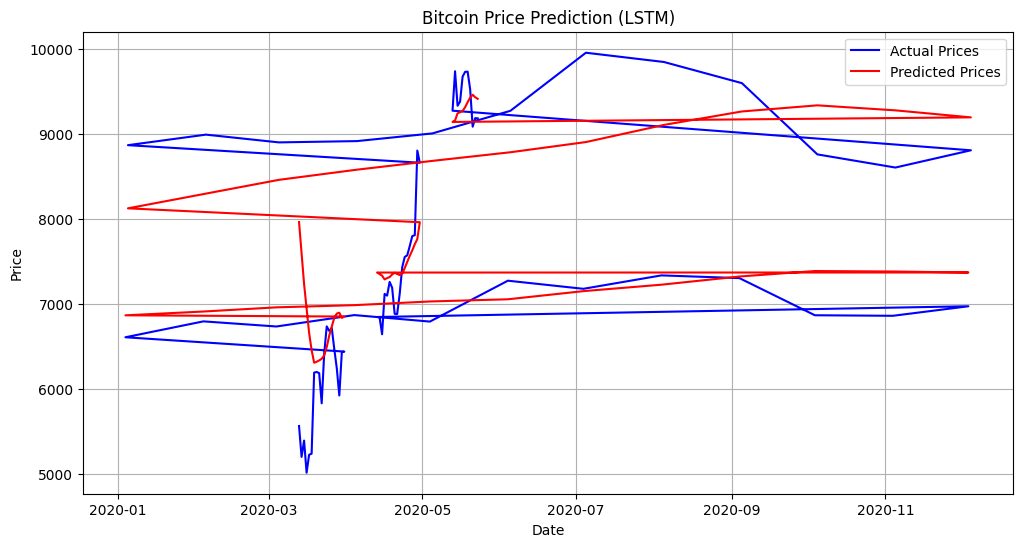

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Price']])

# Define a function to create input sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(seq_length, len(data)):
        sequences.append((data[i - seq_length:i], data[i]))
    return np.array(sequences)

# Create sequences with a specified sequence length (you can adjust this)
sequence_length = 10
sequences = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))
train_sequences = sequences[:split_index]
test_sequences = sequences[split_index:]

# Prepare the data for LSTM
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

# Define and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='b')
plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted Prices', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction (LSTM)')
plt.legend()
plt.grid()
plt.show()

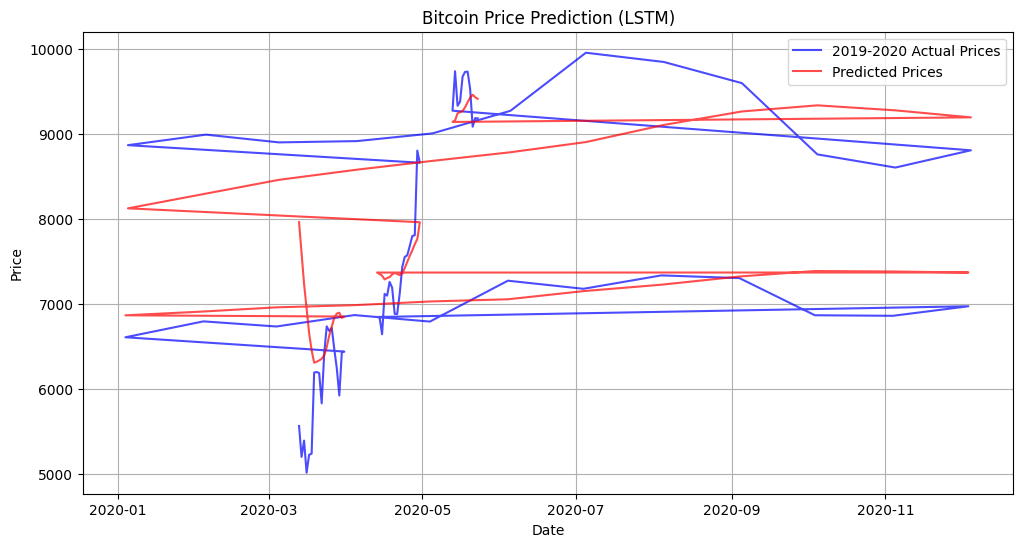

In [15]:
# Plot the actual vs. predicted prices for 2019 and 2020
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='2019-2020 Actual Prices', color='b', alpha=0.7)
plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted Prices', color='r', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction (LSTM)')
plt.legend()
plt.grid()
plt.show()